In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import os

In [54]:

for dirname, _, filenames in os.walk(''):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [55]:
dados = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2019-08-12.csv',',').dropna()
dados

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...,...
3997692,1565567760,11555.57,11555.57,11540.37,11540.58,0.036868,425.909106,11552.336234
3997693,1565567820,11553.49,11556.22,11553.49,11556.22,0.623462,7204.428272,11555.520505
3997694,1565567880,11559.73,11561.22,11546.77,11561.22,0.159070,1838.731403,11559.252199
3997695,1565567940,11559.73,11589.73,11528.73,11528.73,16.198210,187504.635170,11575.638889


In [56]:
# Attempt at using multiple columns (Scrapped as data doesn't correlate at all)
# x = np.array([dados['Open'], dados['High'], dados['Low'], dados['Close']])
# x = x[:, np.newaxis]
# x = x.reshape(x.shape[2], x.shape[1], x.shape[0])
# x = x[:,:,2]
# y = dados['Weighted_Price']
# [x.shape, y.shape]

x = dados[['Timestamp']]
y = dados['Weighted_Price']

In [57]:
x_train, x_test, y_train, y_test=train_test_split(x, y)
[x_train, x_test, y_train, y_test]

[          Timestamp
 3116587  1512701460
 1757900  1431180240
 3004282  1505963160
 1071529  1389609660
 1123265  1392713820
 ...             ...
 2254103  1460952420
 3414423  1530571620
 1608583  1422221220
 3363601  1527522300
 954126   1382565480
 
 [2074364 rows x 1 columns],
           Timestamp
 1636764  1423912080
 3831118  1555573320
 1942535  1442258340
 3482329  1534645980
 1183300  1396315920
 ...             ...
 831380   1375200720
 1137058  1393541400
 2411171  1470376500
 3858889  1557239580
 2243351  1460307300
 
 [691455 rows x 1 columns],
 3116587    16406.393122
 1757900      241.200000
 3004282     3860.824363
 1071529      812.004031
 1123265      635.017654
                ...     
 2254103      427.350000
 3414423     6619.232599
 1608583      249.522382
 3363601     7231.693303
 954126       201.736589
 Name: Weighted_Price, Length: 2074364, dtype: float64,
 1636764     248.496984
 3831118    5265.022867
 1942535     230.937689
 3482329    6355.227503
 1183300

In [58]:
modelo=linear_model.LinearRegression()
modelo.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
print('Fórmula (a * x + b): {} * x + {}'.format(modelo.coef_[0], modelo.intercept_))
print('Qualidade: {}'.format(modelo.score(x_test,y_test)))
print('Desvio padrão: {}'.format(np.sqrt(np.mean((modelo.predict(x_test)-y_test)**2))))

Fórmula (a * x + b): 4.499281298556536e-05 * x + -63043.56117183333
Qualidade: 0.5295687801543232
Desvio padrão: 2562.375250970251


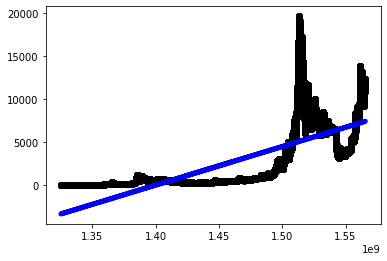

In [60]:
plt.scatter(x_test, y_test, color='black')
plt.plot(x_test, modelo.predict(x_test), color='blue',linewidth=5)

In [10]:
w_test = np.array([[1325317920], [1325391360], [1385775000], [1393639980], [1407332460], [1412097660], [1439094960], [1511926260], [1523958420], [1565568000]])
#                   first input   1224th        1007618th     1138701th     1366909th     1446329th     1889812th     3103667th     3304203th     last input
y_pred = modelo.predict(w_test)
y_pred # ideal would be 4.390000, 4.580000, 1137.000000, 550.481835, 577.350000, 381.058418, 261.864553, 10196.695773, 8148.332643, 11540.450291

array([-3409.90317221, -3406.60176944,  -692.13122861,  -338.57095112,
         276.95725471,   491.17082351,  1704.80046776,  4978.83989798,
        5519.7305078 ,  7390.23680928])

In [61]:
x = dados[['Timestamp']]
y = dados['Weighted_Price']

In [62]:
modelo=linear_model.LinearRegression()
modelo.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
print('Fórmula (a * x + b): {} * x + {}'.format(modelo.coef_[0], modelo.intercept_))
print('Qualidade: {}'.format(modelo.score(x,y)))
print('Desvio padrão: {}'.format(np.sqrt(np.mean((modelo.predict(x)-y)**2))))

Fórmula (a * x + b): 4.496720618703629e-05 * x + -63007.508428131
Qualidade: 0.5299802988079902
Desvio padrão: 2564.6919916682336


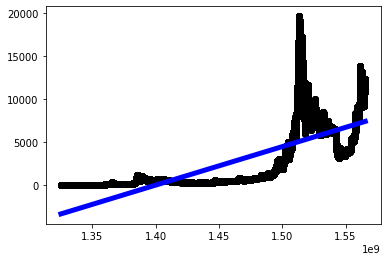

In [64]:
plt.scatter(x, y, color='black')
plt.plot(x, modelo.predict(x), color='blue',linewidth=5)

In [81]:
print(x.size)
print()
i = x.size-30
print(x.tail(30).values.reshape(-1).tolist())
print()
print(modelo.predict(x).ravel()[-30:])

2765819

[1565566260, 1565566320, 1565566380, 1565566440, 1565566500, 1565566560, 1565566620, 1565566680, 1565566740, 1565566800, 1565566860, 1565566920, 1565566980, 1565567040, 1565567100, 1565567160, 1565567220, 1565567280, 1565567340, 1565567400, 1565567460, 1565567520, 1565567580, 1565567640, 1565567700, 1565567760, 1565567820, 1565567880, 1565567940, 1565568000]

[7391.63238476 7391.63508279 7391.63778082 7391.64047885 7391.64317689
 7391.64587492 7391.64857295 7391.65127098 7391.65396902 7391.65666705
 7391.65936508 7391.66206311 7391.66476114 7391.66745918 7391.67015721
 7391.67285524 7391.67555327 7391.67825131 7391.68094934 7391.68364737
 7391.6863454  7391.68904344 7391.69174147 7391.6944395  7391.69713753
 7391.69983557 7391.7025336  7391.70523163 7391.70792966 7391.7106277 ]
